In [309]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
from numpy.linalg import inv
from scipy.stats import norm

In [310]:
os.chdir('/Users/wli17/Documents/GLMM/Simulation_data_GLMM/')

In [311]:
pwd

'/Users/wli17/Documents/GLMM/Simulation_data_GLMM'

In [312]:
LA_files_dirs = glob.glob('Result_LA/*.csv')
LA_fixed_files_dirs = glob.glob('Result_LA_fixed/*.csv')
GH_files_dirs = glob.glob('Result_GH/*.csv')
R_files_dirs = glob.glob('Result_R/*.csv')

In [313]:
# cols = ['Truth', 'Coef', 'Std.Err', 'z', 'P-value', '[0.025', '0.975]', 'RunTime']
# for d in LA_files_dirs:
#     pd.read_csv(d, index_col=0)[cols].to_csv(d, header = True)
# for d in GH_files_dirs:
#     pd.read_csv(d, index_col=0)[cols].to_csv(d, header = True)

In [314]:
LA_result = []
LA_fixed_result = []
GH_result = []
R_result = []
for d in LA_files_dirs:
    LA_result.append(d.split('/')[1])
for d in LA_fixed_files_dirs:
    LA_fixed_result.append(d.split('/')[1])
for d in GH_files_dirs:
    GH_result.append(d.split('/')[1])
for d in R_files_dirs:
    R_result.append(d.split('/')[1])

In [315]:
import fnmatch

In [316]:
filtered = fnmatch.filter(GH_result, 'Setting_4*')
success = []
s = [str(i+1) for i in range(20)]
for l in filtered:
    success.append(l[10:].split('.')[0])
failed = set(s).difference(set(success))
print(len(failed), success)

0 ['5', '4', '6', '7', '3', '2', '1', '20', '19', '18', '15', '14', '16', '17', '13', '12', '10', '11', '9', '8']


In [317]:
df = (pd.read_csv('Result_R/' + LA_result[0], index_col=0) - pd.read_csv('Result_LA/' + LA_result[0], index_col=0))['Coef']

In [318]:
pd.read_csv('Result_LA/' + LA_result[0], index_col=0)

,Truth,Coef,Std.Err,z,P-value,[0.025,0.975],RunTime
X1,-1.50,-0.765598,0.049519,-15.460720,6.388061e-54,-0.862654,-0.668543,439.010293
X2,0.10,0.178023,0.107606,1.654407,9.804494e-02,-0.032880,0.388927,439.010293
X3,-0.50,-0.331093,0.070913,-4.669022,3.026363e-06,-0.470079,-0.192106,439.010293
X4,-0.30,-0.141549,0.063522,-2.228326,2.585878e-02,-0.266050,-0.017047,439.010293
X5,0.40,0.299571,0.063605,4.709892,2.478477e-06,0.174908,0.424234,439.010293
X6,-0.20,-0.159812,0.031647,-5.049817,4.422339e-07,-0.221839,-0.097785,439.010293
X7,-0.25,-0.191576,0.021062,-9.095891,9.381425e-20,-0.232856,-0.150295,439.010293
X8,0.35,0.087247,0.111558,0.782073,4.341718e-01,-0.131403,0.305896,439.010293
X9,-0.10,-0.124891,0.079713,-1.566765,1.171696e-01,-0.281125,0.031343,439.010293
X10,0.50,0.400339,0.054966,7.283376,3.255677e-13,0.292608,0.508071,439.010293


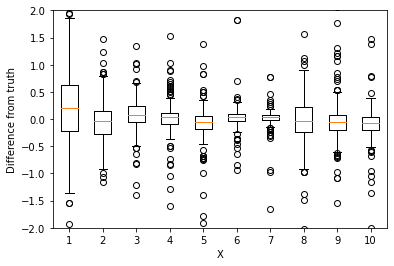

In [319]:
R_coef = pd.DataFrame()
for f in R_result:
    df = pd.read_csv('Result_R/' + f, index_col=0)['Coef'] - [-1.5,0.1,-0.5,-0.3,0.4,-0.2,-0.25,0.35,-0.1,0.5]
    R_coef = pd.concat([R_coef, df], axis = 1)
R_coef = R_coef.dropna(axis = 1)
plt.ylim(-2, 2)
box = plt.boxplot(R_coef.T)
plt.xlabel('X')
plt.ylabel('Difference from truth')
plt.show()

In [320]:
R_coef

,Coef,Coef,Coef,Coef,Coef,Coef,Coef,Coef,Coef,Coef,...,Coef,Coef,Coef,Coef,Coef,Coef,Coef,Coef,Coef,Coef
X1,-0.436835,0.161443,0.383940,-10.838159,2.133803,0.975496,-0.072163,0.036793,0.600062,0.373969,...,-0.762634,0.909023,0.334498,1.322241,0.390998,-0.877624,0.430387,1.272943,-0.274762,-0.402687
X2,0.148595,-0.206554,0.161145,22.238405,-0.134752,-0.020511,0.202458,0.027956,-0.654567,-0.084955,...,-0.925343,-0.765599,0.689911,-0.895897,0.025749,0.570175,-0.028241,-0.233954,0.691828,0.015613
X3,0.147577,-0.056662,-0.251600,11.452328,0.346025,0.189572,-0.304922,0.222696,0.293339,0.093378,...,0.629343,-1.403999,0.350832,-0.528373,0.031650,0.670168,-0.110305,0.328180,0.198835,0.075906
X4,0.178074,0.340865,-0.168936,-8.657347,0.013517,0.107730,-0.046579,0.064028,-0.533393,0.101325,...,-0.006766,-0.298854,0.144234,-0.344439,0.070185,0.676078,0.085267,0.038047,-0.099310,-0.015666
X5,-0.064908,0.344347,0.002514,-10.099718,-0.066918,-0.118506,0.423789,0.042410,0.026989,-0.034288,...,0.099998,-0.267371,0.141724,0.020321,0.021301,0.125494,-0.101969,-0.153664,-0.071429,-0.035455
X6,0.032775,0.072242,0.112123,-2.446656,0.009859,-0.038016,0.287876,-0.193481,-0.360633,0.100801,...,0.130602,0.202136,0.181861,0.159185,0.055284,0.264069,0.079424,0.032244,0.407408,0.011299
X7,0.051973,0.014361,0.079212,-2.810042,-0.004492,0.030089,-0.094024,-0.209214,-0.065874,0.045153,...,-0.102683,-0.015937,0.152079,0.132554,0.055635,0.103927,0.031938,-0.027620,-0.041092,0.081940
X8,-0.230681,-0.705173,0.339392,-3.638161,-0.319096,-0.078693,-0.008249,-0.742512,0.487275,-0.028516,...,-0.314976,-2.020548,0.006183,0.075974,0.219537,0.063886,-0.350626,-0.176004,0.097277,0.275511
X9,-0.045840,-0.197513,-0.486977,-3.848516,0.151733,-0.189406,-1.535460,-0.056366,-0.710659,-0.043160,...,-0.572437,0.325811,-0.058597,0.118005,-0.070745,-0.213739,-0.004580,-0.036134,0.060121,-0.008766
X10,-0.062577,-0.228074,-0.212066,-0.159454,-0.113218,0.037060,0.065432,0.066688,0.019850,-0.018421,...,0.147432,0.765722,-0.064669,-0.293383,-0.209416,0.480762,-0.282055,-0.142810,-0.393040,-0.171218


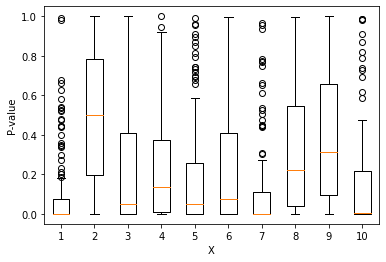

In [321]:
R_coef = pd.DataFrame()
for f in R_result:
    df = pd.read_csv('Result_R/' + f, index_col=0)['P-value']
    R_coef = pd.concat([R_coef, df], axis = 1)
R_coef = R_coef.dropna(axis = 1)
# plt.ylim(0, 1)
box = plt.boxplot(R_coef.T)
plt.xlabel('X')
plt.ylabel('P-value')
plt.show()

# LA 

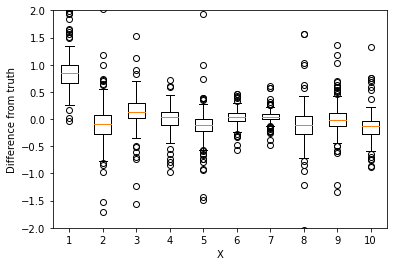

In [322]:
LA_coef = pd.DataFrame()
for f in LA_result:
    df = pd.read_csv('Result_LA/' + f, index_col=0)['Coef'] - [-1.5,0.1,-0.5,-0.3,0.4,-0.2,-0.25,0.35,-0.1,0.5]
    LA_coef = pd.concat([LA_coef, df], axis = 1)
LA_coef = LA_coef.dropna(axis = 1)
plt.ylim(-2, 2)
box = plt.boxplot(LA_coef.T)
plt.xlabel('X')
plt.ylabel('Difference from truth')
plt.show()

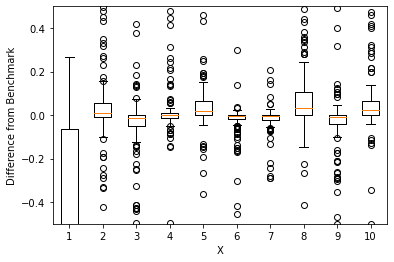

In [323]:
coef_dif = pd.DataFrame()
for f in set(LA_result).intersection(set(R_result)):
    df = (pd.read_csv('Result_R/' + f, index_col=0) - pd.read_csv('Result_LA/' + f, index_col=0))['Coef']
    coef_dif = pd.concat([coef_dif, df], axis = 1)
coef_dif = coef_dif.dropna(axis = 1)
plt.ylim(-0.5, 0.5)
plt.boxplot(coef_dif.T)
plt.xlabel('X')
plt.ylabel('Difference from Benchmark')
plt.show()

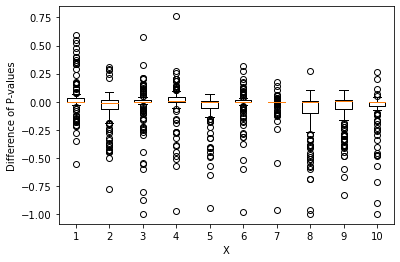

In [324]:
coef_dif = pd.DataFrame()
for f in set(LA_result).intersection(set(R_result)):
    df = (pd.read_csv('Result_R/' + f, index_col=0) - pd.read_csv('Result_LA/' + f, index_col=0))['P-value']
    coef_dif = pd.concat([coef_dif, df], axis = 1)
coef_dif = coef_dif.dropna(axis = 1)
# plt.ylim(-0.5, 0.5)
plt.boxplot(coef_dif.T)
plt.xlabel('X')
plt.ylabel('Difference of P-values')
plt.show()

# LA_fixed

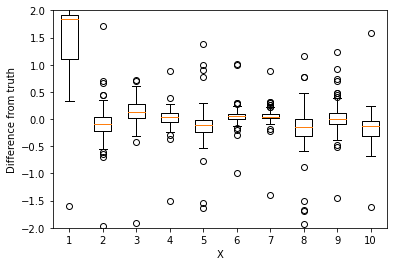

In [325]:
LA_fixed_coef = pd.DataFrame()
for f in LA_fixed_result:
    df = pd.read_csv('Result_LA_fixed/' + f, index_col=0)['Coef'] - [-1.5,0.1,-0.5,-0.3,0.4,-0.2,-0.25,0.35,-0.1,0.5]
    LA_fixed_coef = pd.concat([LA_fixed_coef, df], axis = 1)
LA_fixed_coef = LA_fixed_coef.dropna(axis = 1)
plt.ylim(-2, 2)
box = plt.boxplot(LA_fixed_coef.T)
plt.xlabel('X')
plt.ylabel('Difference from truth')
plt.show()

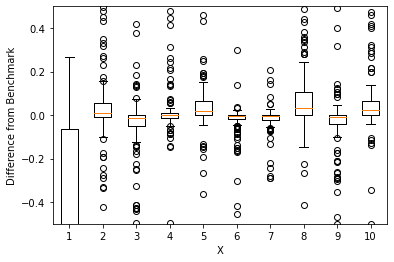

In [326]:
coef_dif = pd.DataFrame()
for f in set(LA_result).intersection(set(R_result)):
    df = (pd.read_csv('Result_R/' + f, index_col=0) - pd.read_csv('Result_LA/' + f, index_col=0))['Coef']
    coef_dif = pd.concat([coef_dif, df], axis = 1)
coef_dif = coef_dif.dropna(axis = 1)
plt.ylim(-0.5, 0.5)
plt.boxplot(coef_dif.T)
plt.xlabel('X')
plt.ylabel('Difference from Benchmark')
plt.show()

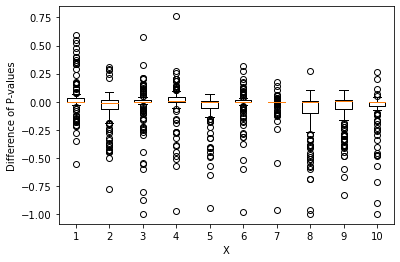

In [327]:
coef_dif = pd.DataFrame()
for f in set(LA_result).intersection(set(R_result)):
    df = (pd.read_csv('Result_R/' + f, index_col=0) - pd.read_csv('Result_LA/' + f, index_col=0))['P-value']
    coef_dif = pd.concat([coef_dif, df], axis = 1)
coef_dif = coef_dif.dropna(axis = 1)
# plt.ylim(-0.5, 0.5)
plt.boxplot(coef_dif.T)
plt.xlabel('X')
plt.ylabel('Difference of P-values')
plt.show()

# GH

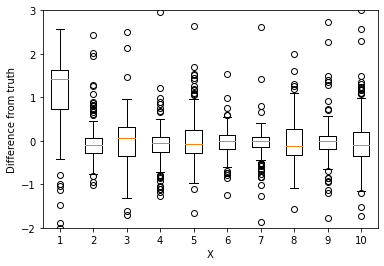

In [328]:
GH_coef = pd.DataFrame()
for f in GH_result:
    df = pd.read_csv('Result_GH/' + f, index_col=0)['Coef'] - [-1.5,0.1,-0.5,-0.3,0.4,-0.2,-0.25,0.35,-0.1,0.5]
    GH_coef = pd.concat([GH_coef, df], axis = 1)
GH_coef = GH_coef.dropna(axis = 1)
plt.ylim(-2, 3)
box = plt.boxplot(GH_coef.T)
plt.xlabel('X')
plt.ylabel('Difference from truth')
plt.show()

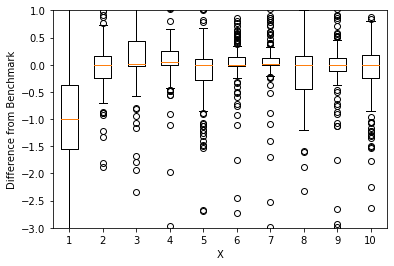

In [329]:
coef_dif = pd.DataFrame()
for f in set(GH_result).intersection(set(R_result)):
    df = (pd.read_csv('Result_R/' + f, index_col=0) - pd.read_csv('Result_GH/' + f, index_col=0))['Coef']
    coef_dif = pd.concat([coef_dif, df], axis = 1)
coef_dif = coef_dif.dropna(axis = 1)
plt.ylim(-3, 1)
plt.boxplot(coef_dif.T)
plt.xlabel('X')
plt.ylabel('Difference from Benchmark')
plt.show()

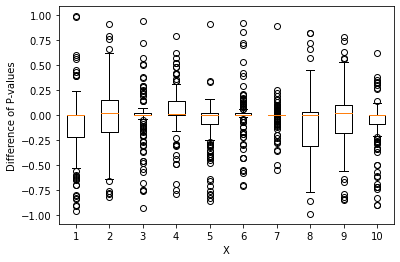

In [330]:
coef_dif = pd.DataFrame()
for f in set(GH_result).intersection(set(R_result)):
    df = (pd.read_csv('Result_R/' + f, index_col=0) - pd.read_csv('Result_GH/' + f, index_col=0))['P-value']
    coef_dif = pd.concat([coef_dif, df], axis = 1)
coef_dif = coef_dif.dropna(axis = 1)
# plt.ylim(-3, 1)
plt.boxplot(coef_dif.T)
plt.xlabel('X')
plt.ylabel('Difference of P-values')
plt.show()

In [331]:
coef_dif

,P-value,P-value,P-value,P-value,P-value,P-value,P-value,P-value,P-value,P-value,...,P-value,P-value,P-value,P-value,P-value,P-value,P-value,P-value,P-value,P-value
X1,-0.000664,-5.891088e-04,-0.000004,0.401114,2.033024e-11,0.010214,-0.827556,-0.635475,-0.101006,0.563866,...,0.052979,-1.602985e-02,0.238440,-0.256731,-0.000007,0.000004,-0.173618,-0.462495,-1.121088e-03,-0.004773
X2,-0.146936,2.545853e-02,-0.273227,-0.438197,5.716023e-01,0.079277,-0.104093,-0.354739,-0.431555,-0.243614,...,-0.760609,2.387906e-01,0.248200,-0.505799,-0.338431,-0.276442,-0.516865,0.007520,3.130634e-01,-0.634577
X3,0.006461,7.906909e-07,-0.758486,-0.085342,3.590043e-05,-0.000059,-0.924832,-0.751798,0.137968,-0.455606,...,-0.162327,4.654071e-03,-0.112790,-0.011106,0.383748,0.060283,0.575424,0.006089,3.837387e-04,0.038442
X4,0.210658,8.256713e-04,0.208492,-0.038303,1.212708e-01,0.060236,-0.292994,-0.439870,0.242754,-0.493500,...,0.364306,2.015755e-02,-0.232437,0.622507,0.036581,0.415053,-0.108089,0.034080,4.816252e-03,0.292467
X5,-0.432748,1.086784e-04,-0.387919,-0.222230,1.917756e-06,0.020066,-0.663404,-0.183730,-0.080466,-0.800631,...,-0.308559,9.975602e-04,0.027319,0.161755,-0.004809,-0.293581,-0.071396,0.000001,2.737308e-05,-0.297193
X6,0.001770,6.171532e-04,-0.008281,-0.004555,1.866396e-03,-0.008305,-0.548150,0.022706,0.063452,-0.428084,...,0.287768,6.642540e-05,-0.067882,0.001004,0.086072,0.002486,0.160096,0.000004,3.905864e-05,0.037029
X7,0.000107,1.000623e-15,0.001553,0.049353,2.527522e-18,0.012800,-0.116979,-0.255077,0.013615,0.896851,...,0.012830,1.157828e-17,-0.068609,0.004488,0.097044,0.000971,0.249736,0.000003,3.408777e-17,0.164283
X8,-0.373357,1.648784e-01,-0.576435,-0.488019,5.685223e-02,-0.020754,-0.201361,-0.764281,-0.350230,-0.602588,...,-0.548888,3.391848e-03,-0.096780,0.823715,-0.447043,-0.087656,-0.572957,0.007191,1.002926e-02,-0.421501
X9,-0.192762,2.161986e-01,-0.473246,0.082421,7.980635e-03,-0.003570,-0.786122,-0.208379,-0.432269,-0.283535,...,-0.434795,3.683805e-01,-0.144846,0.199018,-0.439568,-0.195688,-0.237643,-0.009295,2.715363e-01,-0.220812
X10,-0.237868,3.153355e-07,-0.268934,-0.160497,1.123810e-10,0.073196,-0.723297,-0.688717,-0.259544,-0.616969,...,-0.242833,2.345981e-07,0.136792,0.267700,-0.171309,-0.067098,-0.494041,0.001799,8.323018e-09,-0.267572


# Comparison of coefs

In [332]:
import seaborn as sns

In [333]:
R_coef = R_coef.T
R_coef['method'] = 'Centralized'
GH_coef = GH_coef.T
GH_coef['method'] = 'GH'
LA_coef = LA_coef.T
LA_coef['method'] = 'LA'
LA_GH_R_coef = pd.concat([LA_coef, GH_coef, R_coef], ignore_index=True)

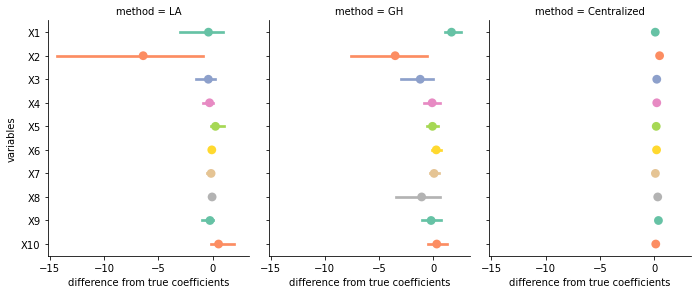

In [334]:
g = sns.catplot(col='method', data=LA_GH_R_coef, 
            kind="point", height=4, aspect=0.8, 
            palette="Set2", dodge=True, orient='h')
g.set_axis_labels('difference from true coefficients', 'variables')

In [335]:
LA_fixed_coef = LA_fixed_coef.T
LA_fixed_coef['method'] = 'LA_fixed'

In [336]:
LA_coef

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,method
Coef,0.734402,0.078023,0.168907,0.158451,-0.100429,0.040188,0.058424,-0.262753,-0.024891,-0.099661,LA
Coef,0.420211,-0.180895,-0.002931,0.320810,0.271839,0.081702,0.049467,-0.710628,-0.169041,-0.284872,LA
Coef,0.589174,0.111217,-0.172112,-0.119064,-0.001899,0.117147,0.092341,0.252739,-0.415476,-0.271687,LA
Coef,0.908801,-0.263236,0.281243,0.308102,-0.211145,-0.128942,0.214887,-0.186916,0.098721,-0.233637,LA
Coef,0.490795,0.710599,0.705822,-0.158052,-0.422357,-0.476757,0.115050,-0.244929,0.096422,-0.221644,LA
...,...,...,...,...,...,...,...,...,...,...,...
Coef,0.028766,0.252228,0.531314,0.414813,-0.058003,0.257558,0.118145,-0.113203,-0.041401,0.194797,LA
Coef,0.968346,-0.042992,-0.074026,0.083860,-0.115926,0.081997,0.034929,-0.352052,0.001886,-0.293392,LA
Coef,1.270471,-0.230229,0.326664,0.043450,-0.153161,0.029309,-0.026597,-0.179644,-0.041652,-0.140465,LA
Coef,0.519506,0.212373,0.221966,-0.114582,-0.225639,0.384921,0.005940,-0.181386,0.057042,-0.423292,LA


In [337]:
LA_fixed_coef

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,method
Coef,3.561292,0.144140,0.154301,0.180569,-0.073347,0.036722,0.056309,-0.233456,-0.043786,-0.071722,LA_fixed
Coef,0.809012,-0.122949,0.093511,-0.042704,0.029817,0.118453,0.090658,-0.203427,-0.080115,-0.563005,LA_fixed
Coef,0.785706,-0.241426,0.341711,0.103113,-0.302227,0.017674,0.231028,-0.202114,0.157250,-0.315216,LA_fixed
Coef,1.841915,-0.134214,0.346462,0.013848,-0.067463,0.010111,-0.004053,-0.319107,0.151752,-0.113775,LA_fixed
Coef,1.843448,-0.026075,0.190246,0.106407,-0.117443,-0.039599,0.029340,-0.077678,-0.195978,0.039325,LA_fixed
...,...,...,...,...,...,...,...,...,...,...,...
Coef,-2.378144,-0.034410,-1.903030,-3.703277,2.632219,-0.290612,-5.108270,-3.616599,-1.446964,-0.088375,LA_fixed
Coef,1.838324,0.025794,0.029349,0.070032,0.022649,0.054888,0.054876,0.223022,-0.071791,-0.208428,LA_fixed
Coef,1.891103,-0.028701,-0.111698,0.084730,-0.101461,0.079345,0.031518,-0.350582,-0.004722,-0.281769,LA_fixed
Coef,1.866642,-0.230486,0.325853,0.042679,-0.152095,0.028420,-0.027706,-0.179130,-0.042564,-0.138805,LA_fixed


In [345]:
LA_fixed_LA_R_coef = pd.concat([LA_fixed_coef, R_coef], ignore_index=True)
LA_fixed_LA_R_coef = LA_fixed_LA_R_coef.drop('X1', axis=1)
LA_fixed_LA_R_coef.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'method']

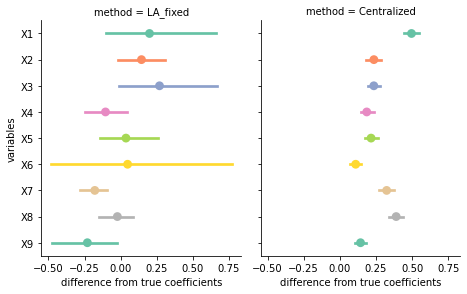

In [348]:
g = sns.catplot(col='method', data=LA_fixed_LA_R_coef, 
            kind="point", height=4, aspect=0.8, 
            palette="Set2", dodge=True, orient='h')#.set(xlim=(-2,2))
g.set_axis_labels('difference from true coefficients', 'variables')

# LA vs R

In [23]:
thres = 0.05

In [24]:
la_pvalues = pd.DataFrame()
for f in set(LA_result).intersection(set(R_result)):
    df = pd.read_csv('Result_LA/' + f, index_col=0)['P-value']
    la_pvalues = pd.concat([la_pvalues, df], axis = 1)
la_pvalues.columns = set(LA_result).intersection(set(R_result))
la_pvalues = (la_pvalues <= thres)
la_pvalues.replace(True, 1, inplace = True)
la_pvalues.replace(False, 0, inplace = True)

In [25]:
r_pvalues = pd.DataFrame()
for f in set(LA_result).intersection(set(R_result)):
    df = pd.read_csv('Result_R/' + f, index_col=0)['P-value']
    r_pvalues = pd.concat([r_pvalues, df], axis = 1)
r_pvalues.columns = set(LA_result).intersection(set(R_result))
r_pvalues = (r_pvalues <= thres)
r_pvalues.replace(True, 1, inplace = True)
r_pvalues.replace(False, 0, inplace = True)

### Precision Recall Accuracy

In [26]:
tp = (la_pvalues * r_pvalues).sum(axis = 1)
tn = (la_pvalues + r_pvalues == 0).sum(axis = 1)
fp = (la_pvalues - r_pvalues == 1).sum(axis = 1)
fn = (la_pvalues - r_pvalues == -1).sum(axis = 1)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
TNR = tn / (tn + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)

In [27]:
pd.DataFrame([precision, recall, TNR, accuracy], 
             index=['Precision', 'Recall', 'True negative rate', 'Accuracy']).T

,Precision,Recall,True negative rate,Accuracy
X1,0.812500,0.858491,0.500000,0.756757
X2,0.900000,0.692308,0.992593,0.966216
X3,0.942029,0.890411,0.946667,0.918919
X4,0.898305,0.929825,0.934066,0.932432
X5,0.971014,0.905405,0.972973,0.939189
X6,0.971429,0.957746,0.974026,0.966216
X7,1.000000,0.962264,1.000000,0.972973
X8,0.944444,0.829268,0.981308,0.939189
X9,0.833333,0.750000,0.976562,0.945946
X10,1.000000,0.892473,1.000000,0.932432


# GH vs R

In [28]:
thres = 0.05

In [29]:
gh_pvalues = pd.DataFrame()
for f in set(GH_result).intersection(set(R_result)):
    df = pd.read_csv('Result_GH/' + f, index_col=0)['P-value']
    gh_pvalues = pd.concat([gh_pvalues, df], axis = 1)
gh_pvalues.columns = set(GH_result).intersection(set(R_result))
gh_pvalues = (gh_pvalues <= thres)
gh_pvalues.replace(True, 1, inplace = True)
gh_pvalues.replace(False, 0, inplace = True)

In [30]:
r_pvalues = pd.DataFrame()
for f in set(GH_result).intersection(set(R_result)):
    df = pd.read_csv('Result_R/' + f, index_col=0)['P-value']
    r_pvalues = pd.concat([r_pvalues, df], axis = 1)
r_pvalues.columns = set(GH_result).intersection(set(R_result))
r_pvalues = (r_pvalues <= thres)
r_pvalues.replace(True, 1, inplace = True)
r_pvalues.replace(False, 0, inplace = True)

### Precision Recall Accuracy

In [31]:
tp = (gh_pvalues * r_pvalues).sum(axis = 1)
tn = (gh_pvalues + r_pvalues == 0).sum(axis = 1)
fp = (gh_pvalues - r_pvalues == 1).sum(axis = 1)
fn = (gh_pvalues - r_pvalues == -1).sum(axis = 1)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
TNR = tn / (tn + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)

In [32]:
pd.DataFrame([precision, recall, TNR, accuracy], 
             index=['Precision', 'Recall', 'True negative rate', 'Accuracy']).T

,Precision,Recall,True negative rate,Accuracy
X1,0.900000,0.712871,0.804878,0.739437
X2,0.250000,0.750000,0.792308,0.788732
X3,0.890411,0.890411,0.884058,0.887324
X4,0.702703,0.928571,0.744186,0.816901
X5,0.893333,0.930556,0.885714,0.908451
X6,0.851852,0.985714,0.833333,0.908451
X7,0.913462,0.950000,0.785714,0.901408
X8,0.637931,0.902439,0.792079,0.823944
X9,0.320000,0.800000,0.721311,0.732394
X10,0.906977,0.866667,0.846154,0.859155


In [33]:
tp

X1     72.0
X2      9.0
X3     65.0
X4     52.0
X5     67.0
X6     69.0
X7     95.0
X8     37.0
X9     16.0
X10    78.0
dtype: float64

In [194]:
r_pvalues

,Setting_2_14.csv,Setting_2_12.csv,Setting_4_6.csv,Setting_2_6.csv,Setting_8_6.csv,Setting_7_16.csv,Setting_5_6.csv,Setting_2_16.csv,Setting_8_8.csv,Setting_1_4.csv,...,Setting_1_2.csv,Setting_4_5.csv,Setting_8_12.csv,Setting_5_12.csv,Setting_7_15.csv,Setting_8_10.csv,Setting_1_17.csv,Setting_1_16.csv,Setting_7_14.csv,Setting_3_3.csv
X1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
X2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
X3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
X4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
X5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
X6,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
X7,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
X8,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
X9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
X10,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


# Synthetic data description

In [34]:
import seaborn as sns

In [35]:
cols = ['Site_ID', 'y']
for i in range(10):
    cols += ['X' + str(i+1)]

### Setting 1

In [36]:
setting1_dir = glob.glob('Setting_1/*.csv')
df = []
for f in setting1_dir:
    df += [pd.read_csv(f, index_col=0)[cols]]
df1 = pd.concat(df, ignore_index=True)
df1['Setting'] = '1'

### Setting 2

In [37]:
setting2_dir = glob.glob('Setting_2/*.csv')
df = []
for f in setting2_dir:
    df += [pd.read_csv(f, index_col=0)[cols]]
df2 = pd.concat(df, ignore_index=True)
df2['Setting'] = '2'

### Setting 3

In [38]:
setting3_dir = glob.glob('Setting_3/*.csv')
df = []
for f in setting3_dir:
    df += [pd.read_csv(f, index_col=0)[cols]]
df3 = pd.concat(df, ignore_index=True)
df3['Setting'] = '3'

### Setting 4

In [39]:
setting4_dir = glob.glob('Setting_4/*.csv')
df = []
for f in setting4_dir:
    df += [pd.read_csv(f, index_col=0)[cols]]
df4 = pd.concat(df, ignore_index=True)
df4['Setting'] = '4'

### Setting 5

In [40]:
setting5_dir = glob.glob('Setting_5/*.csv')
df = []
for f in setting5_dir:
    df += [pd.read_csv(f, index_col=0)[cols]]
df5 = pd.concat(df, ignore_index=True)
df5['Setting'] = '5'

### Setting 6

In [41]:
setting6_dir = glob.glob('Setting_6/*.csv')
df = []
for f in setting6_dir:
    df += [pd.read_csv(f, index_col=0)[cols]]
df6 = pd.concat(df, ignore_index=True)
df6['Setting'] = '6'

### Setting 7

In [42]:
setting7_dir = glob.glob('Setting_7/*.csv')
df = []
for f in setting7_dir:
    df += [pd.read_csv(f, index_col=0)[cols]]
df7 = pd.concat(df, ignore_index=True)
df7['Setting'] = '7'

### Setting 8

In [43]:
setting8_dir = glob.glob('Setting_8/*.csv')
df = []
for f in setting8_dir:
    df += [pd.read_csv(f, index_col=0)[cols]]
df8 = pd.concat(df, ignore_index=True)
df8['Setting'] = '8'

In [44]:
df1.Site_ID = df1.Site_ID.astype('string')

In [45]:
df1.Site_ID.dtypes

StringDtype

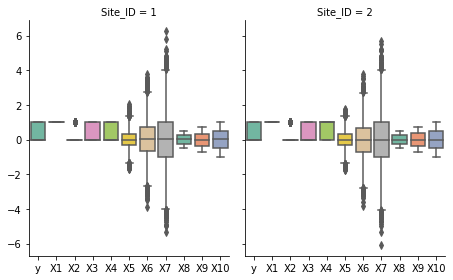

In [46]:
sns.catplot(col='Site_ID', data=df1, 
            kind="box", height=4, aspect=0.8, 
            palette="Set2", dodge=True, orient='v')

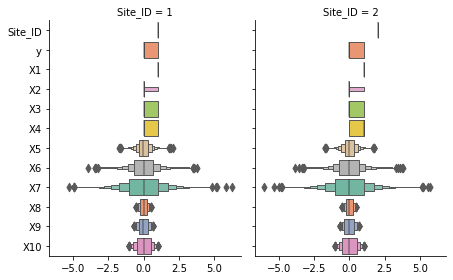

In [47]:
sns.catplot(col='Site_ID', data=df2, 
            kind="boxen", height=4, aspect=0.8, 
            palette="Set2", dodge=True, orient='h')

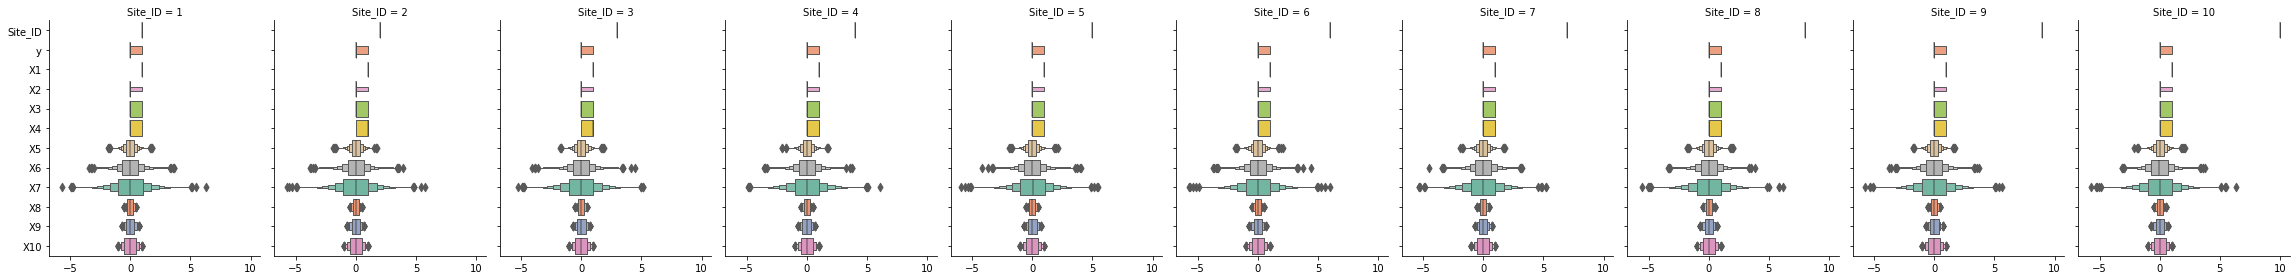

In [48]:
sns.catplot(col='Site_ID', data=df3, 
            kind="boxen", height=4, aspect=0.8, 
            palette="Set2", dodge=True, orient='h')

In [488]:
gigantic1 = pd.concat([df1, df2, df3, df4], ignore_index=True)
gigantic2 = pd.concat([df5, df6, df7, df8], ignore_index=True)

In [489]:
gigantic

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Setting
0,1,1,0,1,0,0.274850,-1.214124,0.644812,0.315149,-0.268313,0.397791,1
1,0,1,0,0,1,-0.089062,-1.251882,-0.175425,-0.374029,-0.289716,-0.404913,1
2,0,1,0,0,1,-0.887237,0.159851,-0.780971,-0.182619,0.534424,0.967411,1
3,0,1,1,0,1,-0.320914,-0.470441,1.507025,-0.396095,-0.660405,0.657371,1
4,0,1,0,1,1,-0.397304,1.734164,-0.368486,-0.201711,0.553712,-0.833217,1
...,...,...,...,...,...,...,...,...,...,...,...,...
254395,1,1,0,0,0,0.288480,-0.171046,1.331832,0.406753,-0.665479,0.083939,8
254396,0,1,0,0,0,1.108161,2.409080,-0.246563,-0.258853,0.289491,-0.151380,8
254397,0,1,0,0,1,0.091177,-0.938605,1.378301,0.020049,0.425827,-0.628626,8
254398,1,1,0,0,1,-0.194620,0.153938,1.328989,0.365224,-0.212536,-0.556981,8


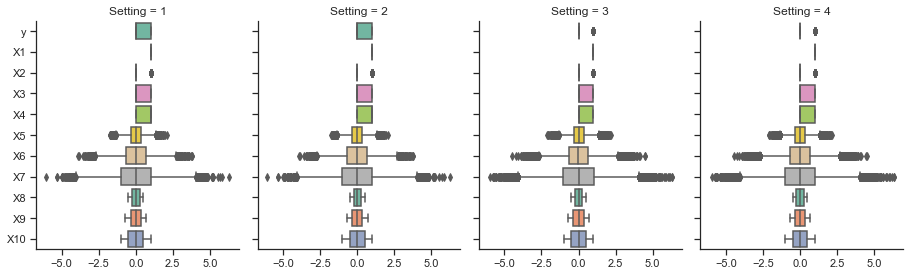

In [1020]:
sns.catplot(col='Setting', data=gigantic1.iloc[:,1:], 
            kind="box", height=4, aspect=0.8, 
            palette="Set2", dodge=True, orient='h')

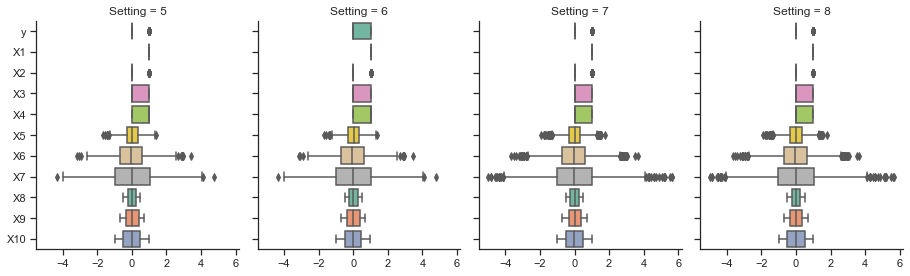

In [1021]:
sns.catplot(col='Setting', data=gigantic2.iloc[:,1:], 
            kind="box", height=4, aspect=0.8, 
            palette="Set2", dodge=True, orient='h')

# Golden truth p-value

In [49]:
coefs = [-1.5,0.1,-0.5,-0.3,0.4,-0.2,-0.25,0.35,-0.1,0.5]
cols = []
for i in range(10):
    cols += ['X' + str(i+1)]

In [50]:
def Pi(x, beta_0, mu):
    return np.asarray((np.exp(x @ beta_0 + mu) / (1 + np.exp(x @ beta_0 + mu))))

def output(X, beta):
    V = np.diagflat(Pi(X, beta, 0) * (1 - Pi(X, beta, 0)))
 
    SE = np.sqrt(np.diag(inv(np.dot(np.transpose(X) @ V, X)))).reshape(10,1)

    Z = beta/SE

    P = 2 * norm.cdf(-1 * np.abs(Z))

    CI_025  = beta - 1.959964 * SE
    CI_975  = beta + 1.959964 * SE

    df = pd.DataFrame({'Coef': np.transpose(beta), 'Std.Err': np.transpose(SE)[0],
                       'z': np.transpose(Z)[0], 'P-value': np.transpose(P)[0],
                       '[0.025': np.transpose(CI_025)[0], '0.975]': np.transpose(CI_975)[0]},
                      index = cols)
    return df

### Setting 1

In [51]:
setting1_dir = glob.glob('Setting_1/*.csv')
for f in setting1_dir:
    X = pd.read_csv(f, index_col=0)[cols]
    output(X, coefs).to_csv('./Result_Benchmark/Setting_1_' + f[54:], header = True)

### Setting 2

In [52]:
setting2_dir = glob.glob('Setting_2/*.csv')
for f in setting2_dir:
    X = pd.read_csv(f, index_col=0)[cols]
    output(X, coefs).to_csv('./Result_Benchmark/Setting_2_' + f[54:], header = True)

### Setting 3

In [53]:
setting3_dir = glob.glob('Setting_3/*.csv')
for f in setting3_dir:
    X = pd.read_csv(f, index_col=0)[cols]
    output(X, coefs).to_csv('./Result_Benchmark/Setting_3_' + f[55:], header = True)

### Setting 4

In [54]:
setting4_dir = glob.glob('Setting_4/*.csv')
for f in setting4_dir:
    X = pd.read_csv(f, index_col=0)[cols]
    output(X, coefs).to_csv('./Result_Benchmark/Setting_4_' + f[55:], header = True)

### Setting 5

In [55]:
setting5_dir = glob.glob('Setting_5/*.csv')
for f in setting5_dir:
    X = pd.read_csv(f, index_col=0)[cols]
    output(X, coefs).to_csv('./Result_Benchmark/Setting_5_' + f[53:], header = True)

### Setting 6

In [56]:
setting6_dir = glob.glob('Setting_6/*.csv')
for f in setting6_dir:
    X = pd.read_csv(f, index_col=0)[cols]
    output(X, coefs).to_csv('./Result_Benchmark/Setting_6_' + f[53:], header = True)

### Setting 7

In [57]:
setting7_dir = glob.glob('Setting_7/*.csv')
for f in setting7_dir:
    X = pd.read_csv(f, index_col=0)[cols]
    output(X, coefs).to_csv('./Result_Benchmark/Setting_7_' + f[54:], header = True)

### Setting 8

In [58]:
setting8_dir = glob.glob('Setting_8/*.csv')
for f in setting8_dir:
    X = pd.read_csv(f, index_col=0)[cols]
    output(X, coefs).to_csv('./Result_Benchmark/Setting_8_' + f[54:], header = True)

# Comparison between Benchmark

In [23]:
LA_files_dirs = glob.glob('Result_LA/*.csv')
LA_files_fixed_dirs = glob.glob('Result_LA_fixed/*.csv')
GH_files_dirs = glob.glob('Result_GH/*.csv')
R_files_dirs = glob.glob('Result_R/*.csv')
Ben_files_dirs = glob.glob('Result_Benchmark/*.csv')

In [24]:
LA_result = []
LA_result_fixed = []
GH_result = []
R_result = []
Ben_result = []
for d in LA_files_dirs:
    LA_result.append(d.split('/')[1])
for d in LA_files_fixed_dirs:
    LA_result_fixed.append(d.split('/')[1])
for d in GH_files_dirs:
    GH_result.append(d.split('/')[1])
for d in R_files_dirs:
    R_result.append(d.split('/')[1])
for d in Ben_files_dirs:
    Ben_result.append(d.split('/')[1])

## R vs Benchmark

In [61]:
thres = 0.05

In [62]:
ben_pvalues = pd.DataFrame()
for f in set(Ben_result).intersection(set(R_result)):
    df = pd.read_csv('Result_Benchmark/' + f, index_col=0)['P-value']
    ben_pvalues = pd.concat([ben_pvalues, df], axis = 1)
ben_pvalues.columns = set(Ben_result).intersection(set(R_result))
ben_pvalues = (ben_pvalues <= thres)
ben_pvalues.replace(True, 1, inplace = True)
ben_pvalues.replace(False, 0, inplace = True)

In [63]:
r_pvalues = pd.DataFrame()
for f in set(Ben_result).intersection(set(R_result)):
    df = pd.read_csv('Result_R/' + f, index_col=0)['P-value']
    r_pvalues = pd.concat([r_pvalues, df], axis = 1)
r_pvalues.columns = set(LA_result).intersection(set(R_result))
r_pvalues = (r_pvalues <= thres)
r_pvalues.replace(True, 1, inplace = True)
r_pvalues.replace(False, 0, inplace = True)

### Precision Recall Accuracy

In [64]:
tp = (ben_pvalues * r_pvalues).sum(axis = 1)
tn = (ben_pvalues + r_pvalues == 0).sum(axis = 1)
fp = (ben_pvalues - r_pvalues == 1).sum(axis = 1)
fn = (ben_pvalues - r_pvalues == -1).sum(axis = 1)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
TNR = tn / (tn + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)

In [65]:
r_pra = pd.DataFrame([precision, recall, TNR, accuracy], 
             index=['Precision', 'Recall', 'True negative rate', 'Accuracy']).T

In [67]:
r_pra.to_csv('pr_r.csv', index=True)

## LA vs Benchmark

In [68]:
thres = 0.05

In [69]:
ben_pvalues = pd.DataFrame()
for f in set(Ben_result).intersection(set(LA_result)):
    df = pd.read_csv('Result_Benchmark/' + f, index_col=0)['P-value']
    ben_pvalues = pd.concat([ben_pvalues, df], axis = 1)
ben_pvalues.columns = set(Ben_result).intersection(set(LA_result))
ben_pvalues = (ben_pvalues <= thres)
ben_pvalues.replace(True, 1, inplace = True)
ben_pvalues.replace(False, 0, inplace = True)

In [70]:
la_pvalues = pd.DataFrame()
for f in set(Ben_result).intersection(set(LA_result)):
    df = pd.read_csv('Result_LA/' + f, index_col=0)['P-value']
    la_pvalues = pd.concat([la_pvalues, df], axis = 1)
la_pvalues.columns = set(Ben_result).intersection(set(LA_result))
la_pvalues = (la_pvalues <= thres)
la_pvalues.replace(True, 1, inplace = True)
la_pvalues.replace(False, 0, inplace = True)

### Precision Recall Accuracy

In [71]:
tp = (ben_pvalues * la_pvalues).sum(axis = 1)
tn = (ben_pvalues + la_pvalues == 0).sum(axis = 1)
fp = (ben_pvalues - la_pvalues == 1).sum(axis = 1)
fn = (ben_pvalues - la_pvalues == -1).sum(axis = 1)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
TNR = tn / (tn + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)

In [72]:
la_pra=pd.DataFrame([precision, recall, TNR, accuracy], 
             index=['Precision', 'Recall', 'True negative rate', 'Accuracy']).T

In [73]:
la_pra.to_csv('pr_la.csv', index=True)

## GH vs Benchmark

In [74]:
thres = 0.05

In [75]:
ben_pvalues = pd.DataFrame()
for f in set(Ben_result).intersection(set(GH_result)):
    df = pd.read_csv('Result_Benchmark/' + f, index_col=0)['P-value']
    ben_pvalues = pd.concat([ben_pvalues, df], axis = 1)
ben_pvalues.columns = set(Ben_result).intersection(set(GH_result))
ben_pvalues = (ben_pvalues <= thres)
ben_pvalues.replace(True, 1, inplace = True)
ben_pvalues.replace(False, 0, inplace = True)

In [76]:
gh_pvalues = pd.DataFrame()
for f in set(Ben_result).intersection(set(GH_result)):
    df = pd.read_csv('Result_GH/' + f, index_col=0)['P-value']
    gh_pvalues = pd.concat([gh_pvalues, df], axis = 1)
gh_pvalues.columns = set(Ben_result).intersection(set(GH_result))
gh_pvalues = (gh_pvalues <= thres)
gh_pvalues.replace(True, 1, inplace = True)
gh_pvalues.replace(False, 0, inplace = True)

### Precision Recall Accuracy

In [77]:
tp = (ben_pvalues * gh_pvalues).sum(axis = 1)
tn = (ben_pvalues + gh_pvalues == 0).sum(axis = 1)
fp = (ben_pvalues - gh_pvalues == 1).sum(axis = 1)
fn = (ben_pvalues - gh_pvalues == -1).sum(axis = 1)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
TNR = tn / (tn + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)

In [78]:
gh_pra=pd.DataFrame([precision, recall, TNR, accuracy], 
             index=['Precision', 'Recall', 'True negative rate', 'Accuracy']).T

In [79]:
gh_pra.to_csv('pr_gh.csv', index=True)

In [853]:
r_pra['method']='Centralized'
la_pra['method']='LA'
gh_pra['method']='GH'
pra = pd.concat([r_pra, la_pra, gh_pra], ignore_index=True)

In [866]:
pd.concat([r_pra.T, la_pra.T, gh_pra.T])

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
Precision,0.716216,0.1,0.591667,0.44,0.570312,0.47973,0.716216,0.316667,0.141667,0.632653
Recall,1,0.923077,0.972603,0.964912,0.986486,1,1,0.926829,0.85,1
True negative rate,0,0.2,0.346667,0.230769,0.256757,0,0,0.233645,0.195312,0.0181818
Accuracy,0.716216,0.263514,0.655405,0.513514,0.621622,0.47973,0.716216,0.425676,0.283784,0.635135
method,Centralized,Centralized,Centralized,Centralized,Centralized,Centralized,Centralized,Centralized,Centralized,Centralized
Precision,0.70625,0.0833333,0.575,0.460938,0.530303,0.4375,0.65625,0.3,0.15,0.531646
Recall,1,1,0.985714,1,0.985915,1,1,1,1,1
True negative rate,0,0.266667,0.433333,0.316832,0.303371,0,0,0.322581,0.28169,0.0263158
Accuracy,0.70625,0.3125,0.675,0.56875,0.60625,0.4375,0.65625,0.475,0.3625,0.5375
method,LA,LA,LA,LA,LA,LA,LA,LA,LA,LA


In [860]:
sns.catplot(col='method', data=pra, x='X1',
            kind="bar", height=4, aspect=0.8, 
            palette="Set2", dodge=True, orient='h')

ValueError: Could not interpret input 'X1'

### Power curve

In [349]:
ben_pvalues = pd.DataFrame()
for f in set(Ben_result).intersection(set(GH_result)):
    df = pd.read_csv('Result_Benchmark/' + f, index_col=0)['P-value']
    ben_pvalues = pd.concat([ben_pvalues, df], axis = 1)
ben_pvalues.columns = set(Ben_result).intersection(set(GH_result))

r_pvalues = pd.DataFrame()
for f in set(Ben_result).intersection(set(R_result)):
    df = pd.read_csv('Result_R/' + f, index_col=0)['P-value']
    r_pvalues = pd.concat([r_pvalues, df], axis = 1)
r_pvalues.columns = set(LA_result).intersection(set(R_result))

la_pvalues = pd.DataFrame()
for f in set(Ben_result).intersection(set(LA_result)):
    df = pd.read_csv('Result_LA/' + f, index_col=0)['P-value']
    la_pvalues = pd.concat([la_pvalues, df], axis = 1)
la_pvalues.columns = set(Ben_result).intersection(set(LA_result))

la_fixed_pvalues = pd.DataFrame()
for f in set(Ben_result).intersection(set(LA_fixed_result)):
    df = pd.read_csv('Result_LA_fixed/' + f, index_col=0)['P-value']
    la_fixed_pvalues = pd.concat([la_fixed_pvalues, df], axis = 1)
la_fixed_pvalues.columns = set(Ben_result).intersection(set(LA_fixed_result))

gh_pvalues = pd.DataFrame()
for f in set(Ben_result).intersection(set(GH_result)):
    df = pd.read_csv('Result_GH/' + f, index_col=0)['P-value']
    gh_pvalues = pd.concat([gh_pvalues, df], axis = 1)
gh_pvalues.columns = set(Ben_result).intersection(set(GH_result))

# power = []
# for thres in np.arange(0,1.01,0.01):
#     ben = (ben_pvalues <= thres)
#     ben.replace(True, 1, inplace = True)
#     ben.replace(False, 0, inplace = True)
#     gh = (gh_pvalues <= thres)
#     gh.replace(True, 1, inplace = True)
#     gh.replace(False, 0, inplace = True)
#     tp = (ben * gh).sum(axis = 1)
#     tn = (ben + gh == 0).sum(axis = 1)
#     fp = (ben - gh == 1).sum(axis = 1)
#     fn = (ben - gh == -1).sum(axis = 1)
#     power += [tp/(tp + fn)]

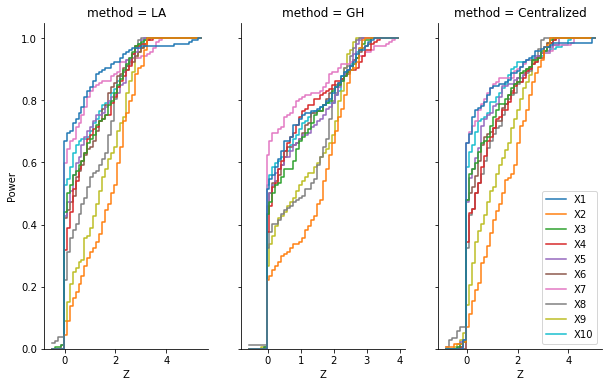

In [350]:
fig, axes = plt.subplots(1, 3, figsize=(10,6), sharey=True)
sns.histplot(((r_pvalues - ben_pvalues).T / np.std((r_pvalues - ben_pvalues).T)),
             element="step", fill=False, cumulative=True, stat="density", common_norm=False,
             bins = 50, ax=axes[2])
sns.histplot(((la_pvalues - ben_pvalues).T / np.std((la_pvalues - ben_pvalues).T)),
             element="step", fill=False, cumulative=True, stat="density", common_norm=False,
             bins = 50, ax=axes[0], legend=False)
sns.histplot(((gh_pvalues - ben_pvalues).T / np.std((gh_pvalues - ben_pvalues).T)),
             element="step", fill=False, cumulative=True, stat="density", common_norm=False,
             bins = 50, ax=axes[1], legend=False)
axes[2].set(xlabel='Z', ylabel='Power', title='method = Centralized')
axes[0].set(xlabel='Z', ylabel='Power', title='method = LA')
axes[1].set(xlabel='Z', ylabel='Power', title='method = GH')
sns.despine()
plt.savefig('/Users/wli17/Dropbox/Research/GLMM_paper/power.png')
# g.set(xlabel='Z', ylabel='Power', title='Centralized')

In [387]:
# pip install -U seaborn
import seaborn as sns

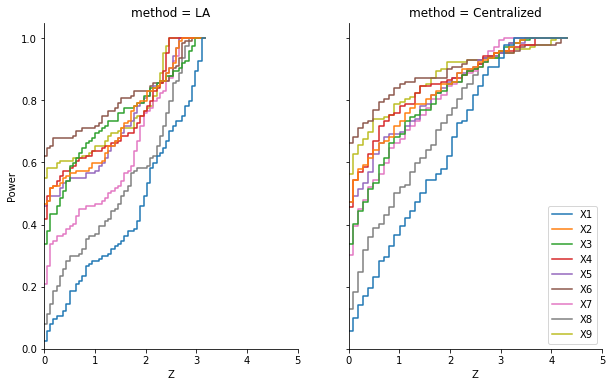

In [399]:
fig, axes = plt.subplots(1, 2, figsize=(10,6), sharey=True)
la_fixed_power = ((la_fixed_pvalues - ben_pvalues).T / np.std((la_fixed_pvalues - ben_pvalues).T)).drop('X1', axis=1)
la_fixed_power.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9']
ax1 = sns.histplot(la_fixed_power,
             element="step", fill=False, cumulative=True, stat="density", common_norm=False,
             bins = 50, ax=axes[0], legend=False).set(xlim=(0,5))
# sns.move_legend(ax1, 'lower right')
r_power = ((r_pvalues - ben_pvalues).T / np.std((r_pvalues - ben_pvalues).T)).drop('X1', axis=1)
r_power.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9']
sns.histplot(r_power,
             element="step", fill=False, cumulative=True, stat="density", common_norm=False,
             bins = 50, ax=axes[1]).set(xlim=(0,5))
axes[0].set(xlabel='Z', ylabel='Power', title='method = LA')
axes[1].set(xlabel='Z', ylabel='Power', title='method = Centralized')
sns.despine()

[Text(0.5, 0, 'Z'), Text(0, 0.5, 'Power'), Text(0.5, 1.0, 'Laplace')]

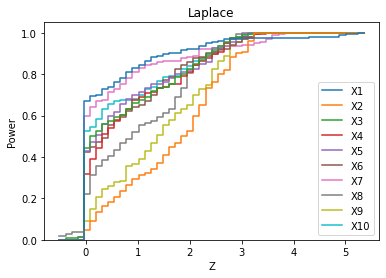

In [351]:
g = sns.histplot(((la_pvalues - ben_pvalues).T / np.std((la_pvalues - ben_pvalues).T)),
             element="step", fill=False, cumulative=True, stat="density", common_norm=False,
             bins = 50)
g.set(xlabel='Z', ylabel='Power', title='Laplace')

[Text(0.5, 0, 'Z'), Text(0, 0.5, 'Power'), Text(0.5, 1.0, 'Laplace Fixed')]

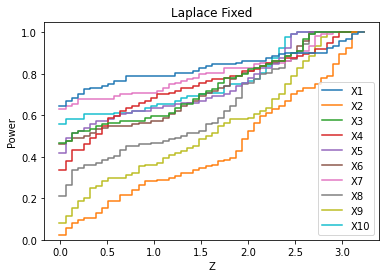

In [395]:
g = sns.histplot(((la_fixed_pvalues - ben_pvalues).T / np.std((la_fixed_pvalues - ben_pvalues).T)),
             element="step", fill=False, cumulative=True, stat="density", common_norm=False,
             bins = 50)
g.set(xlabel='Z', ylabel='Power', title='Laplace Fixed')

[Text(0.5, 0, 'Z'), Text(0, 0.5, 'Power'), Text(0.5, 1.0, 'Gauss-Hermite')]

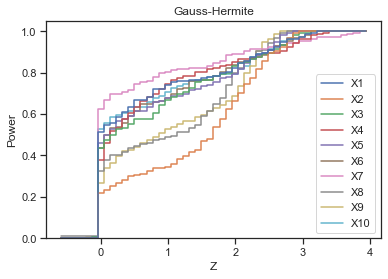

In [962]:
g = sns.histplot(((gh_pvalues - ben_pvalues).T / np.std((gh_pvalues - ben_pvalues).T)),
             element="step", fill=False, cumulative=True, stat="density", common_norm=False,
             bins = 50)
g.set(xlabel='Z', ylabel='Power', title='Gauss-Hermite')

In [942]:
r_power = (r_pvalues - ben_pvalues).T / np.std((r_pvalues - ben_pvalues).T)
r_power['method'] = 'Centralized'
la_power = (la_pvalues - ben_pvalues).T / np.std((la_pvalues - ben_pvalues).T)
la_power['method'] = 'Laplace'
gh_power = (gh_pvalues - ben_pvalues).T / np.std((gh_pvalues - ben_pvalues).T)
gh_power['method'] = 'Gauss-Hermite'

In [944]:
power = pd.concat([r_power, la_power, gh_power])
power

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,method
Setting_1_1.csv,1.614537e-01,2.061885e+00,4.629996e-03,4.684501e-01,7.355637e-02,1.114482e+00,1.666619e-02,1.626378e+00,3.305435e+00,1.877544e-02,Centralized
Setting_1_10.csv,3.912187e-13,2.944408e-01,3.241372e+00,1.528901e-01,7.449621e-02,4.494541e-01,2.639706e-05,1.828881e+00,1.586322e-02,3.739344e-05,Centralized
Setting_1_11.csv,3.367845e+00,9.624801e-01,1.711962e+00,1.115987e+00,4.236205e-01,1.478938e+00,4.343209e-07,4.649850e-01,1.799986e+00,7.146051e-02,Centralized
Setting_1_12.csv,9.951582e-21,3.287836e+00,3.422867e-02,6.993929e-01,2.783873e-02,5.252799e-02,2.508347e-04,2.703684e+00,2.634948e+00,5.229109e-01,Centralized
Setting_1_13.csv,2.951018e-08,1.737672e+00,7.488106e-01,1.798828e+00,1.697550e-01,1.597936e-03,2.540737e-09,8.129431e-01,2.280544e+00,8.433395e-04,Centralized
...,...,...,...,...,...,...,...,...,...,...,...
Setting_8_10.csv,5.306792e-03,2.474514e+00,1.135340e+00,9.743204e-01,2.482603e+00,1.047667e-01,2.242074e-02,1.746898e+00,2.095406e+00,1.825677e-01,Gauss-Hermite
Setting_1_17.csv,4.350855e-02,2.711921e+00,3.224016e-03,8.543983e-04,5.228657e-01,7.086822e-04,7.364560e-04,1.874214e+00,5.627547e-01,4.183276e-04,Gauss-Hermite
Setting_1_16.csv,2.539709e+00,1.752597e+00,1.584705e-02,5.786217e-03,4.506333e-03,8.226327e-04,5.742867e-05,6.234995e-04,2.359550e-02,2.520551e-05,Gauss-Hermite
Setting_7_14.csv,1.826853e-05,2.657824e+00,3.019210e+00,3.337915e-01,1.248716e+00,5.520857e-01,4.257725e-02,2.262212e+00,2.172546e+00,9.473852e-01,Gauss-Hermite
